In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive")


# Imports

In [2]:
# code from chris
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf

2024-03-19 14:06:03.387779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 14:06:03.387848: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 14:06:03.389527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 14:06:03.398299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 14:06:06.500767: W tensorflow/compiler/tf2

In [3]:
# # if i run it on colab, i will use the following code:
# import os
# import tensorflow as tf

In [2]:

import pandas as pd
import numpy as np

from tensorflow import keras
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
#from spellchecker import SpellChecker # pyspellchecker

import re, math, sklearn, datetime, pickle

2024-03-28 17:02:27.247605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 17:02:27.247796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 17:02:27.591076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 17:02:28.014977: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 17:02:32.241971: W tensorflow/compiler/tf2

In [5]:
# on colab
# movies_df = pd.read_pickle('/content/gdrive/MyDrive/raw_data/title_plot_movieId.pkl')

In [6]:
# on local
movies_df = pd.read_pickle('../raw_data/title_plot_movieId.pkl')
movies_df.head()

,title,plot_synopsis,movieId
0,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...",62
1,Scarface,"In May 1980, a Cuban man named Tony Montana (A...",4262
5,Flightplan,Kyle Pratt (Jodie Foster) is a propulsion engi...,37727
6,Little Caesar,Small-time Italian-American criminals Caesar E...,25773
7,Savages,The movie begins with a video being shot of me...,56956


In [7]:
movies_df[movies_df['movieId']==8800]


,title,plot_synopsis,movieId
4006,Code 46,In the near future the world is divided betwee...,8800


In [8]:
# on colab
# ML_df = pd.read_csv('/content/gdrive/MyDrive/raw_data/MovieLens_20M/rating.csv')

In [9]:
# on local
ML_df = pd.read_csv('../raw_data/MovieLens_20M/rating.csv')
ML_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [10]:
# on colab
#prompt_embeddings = np.load('/content/gdrive/MyDrive/raw_data/processed_data_shared/embedding_summary.npy')
# on local
prompt_embeddings = np.load('../processed_data/embedding_summary.npy')
#prompt_embeddings

In [3]:
#on colab
#movie_embeddings = np.load('/content/gdrive/MyDrive/raw_data/processed_data_shared/embeddings_plot.npy')
# on local
movie_embeddings = np.load('../processed_data/embeddings_plot.npy')
#movie_embeddings
movie_embeddings

array([[-0.53041595,  0.07894719, -4.174719  , ...,  0.12080551,
        -0.26163393,  1.4187174 ],
       [-1.905204  , -0.8651164 , -4.592863  , ..., -0.17127784,
        -1.253442  ,  1.5046824 ],
       [-0.28870344,  0.77760345, -4.161852  , ..., -0.11134774,
        -1.0922287 ,  1.1931078 ],
       ...,
       [-0.81509817, -0.6829499 , -3.551226  , ..., -0.33899182,
        -1.1144806 ,  1.6991515 ],
       [-0.03485849,  0.23413755, -4.033015  , ..., -0.37820697,
        -0.88044584,  1.4345179 ],
       [ 0.48980176,  0.11468987, -4.8762465 , ..., -1.0247263 ,
        -2.0596142 ,  0.52620435]], dtype=float32)

In [12]:
movies_embed = pd.DataFrame(movie_embeddings, index= movies_df['movieId'])
movies_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
movieId,,,,,,,,,,,,,,,,,,,,,
62,-0.530416,0.078947,-4.174719,-1.435039,-0.898514,-0.367455,0.821316,2.128489,-0.941272,0.092330,...,-0.210147,-1.126048,0.432286,-0.112529,-0.043328,0.398397,-2.933069,0.120806,-0.261634,1.418717
4262,-1.905204,-0.865116,-4.592863,-0.895485,0.398868,-0.159829,0.323029,1.464534,-0.787005,-0.229432,...,-0.024952,0.193613,-1.138376,-0.505963,0.235267,0.990854,-1.697680,-0.171278,-1.253442,1.504682
37727,-0.288703,0.777603,-4.161852,-1.234209,-1.600972,-0.023080,-0.171694,1.547100,-0.387954,0.361121,...,-0.283541,-0.165137,-0.385934,-0.581091,0.256357,1.251525,-2.286271,-0.111348,-1.092229,1.193108
25773,-0.343458,-0.619050,-4.162664,-0.957605,-0.252660,-1.555827,0.089815,1.528994,-0.357764,0.361894,...,0.380811,-0.034098,-1.412204,0.257579,0.449015,1.037348,-1.915668,-0.001579,-0.433293,1.792258
56956,-0.894828,-0.701282,-4.802172,-1.100362,0.622783,-0.532807,0.059094,2.841970,-0.761153,0.317101,...,0.905928,0.066293,-0.272078,0.710268,-0.272066,-0.026071,-1.176718,-1.388201,-0.977839,2.320689


In [13]:
prompts_embed = pd.DataFrame(prompt_embeddings, index= movies_df['movieId'])
prompts_embed.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
movieId,,,,,,,,,,,,,,,,,,,,,
62,-0.643445,-0.395430,-4.088519,-2.476784,0.065044,-1.401066,-0.521427,-0.292286,-1.009134,-0.137444,...,-0.562036,-0.887493,-0.582381,0.349723,0.947146,-1.402179,-0.538435,-2.477199,0.457515,1.923286
4262,-0.667590,-0.706178,-4.087876,-2.354048,0.272632,-1.616781,-0.838146,-0.328010,-0.813613,0.347498,...,-0.254029,-0.721833,-1.064592,0.780748,1.435769,-1.081843,-0.111125,-2.541416,0.316348,2.190334
37727,-0.331173,-0.430575,-4.064622,-2.678680,-0.466110,-1.113054,-1.040370,0.071133,-0.780748,0.716909,...,-0.671378,-0.673283,-0.659972,-0.042420,0.875326,-1.276242,-0.566479,-2.622893,0.285767,2.197447
25773,-0.576120,-0.832623,-3.914762,-2.431295,0.223214,-1.759424,-0.891972,-0.448007,-0.782553,0.160594,...,-0.559849,-0.868267,-1.135357,0.498278,1.406906,-1.143107,-0.104455,-2.373625,0.202973,2.104166
56956,-0.601033,-0.968912,-4.179355,-2.301611,0.613752,-1.425504,-1.224570,0.055443,-0.931644,0.525285,...,0.012788,-0.507534,-1.144119,0.681214,1.422258,-1.281380,-0.127091,-2.888142,0.222285,2.507713


In [14]:
user_df = ML_df[['userId', 'movieId', 'rating']]
user_df.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


# Preprocessing

In [15]:
user_df_fil = user_df[user_df['movieId'].isin(list(movies_df['movieId']))]
user_df_fil.head()

,userId,movieId,rating
0,1,2,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
11,1,296,4.0


In [16]:
rating_counts = user_df_fil.groupby('movieId').count()

In [17]:
rating_counts_fil = rating_counts[rating_counts['rating']>=500].sort_values(by='rating')

In [18]:
rating_counts_fil

,userId,rating
movieId,,
63479,500,500
74450,500,500
51471,501,501
59037,501,501
8800,501,501
...,...,...
589,52244,52244
110,53769,53769
480,59715,59715


In [24]:
movies_keep = list(rating_counts_fil.index)

In [25]:
len(movies_keep)

2449

In [31]:
# check how many users have rated the movies
relevant_users = user_df_fil[user_df_fil['movieId'].isin(movies_keep) & (user_df_fil['rating']>=4)].groupby('userId', as_index=False).agg({'movieId': 'count'})
relevant_users.sort_values(by='movieId', ascending=False)

,userId,movieId
125433,125794,1250
133423,133811,1058
82168,82418,954
106627,106939,882
34542,34651,878
...,...,...
25252,25329,1
137342,137740,1
113734,114065,1
17619,17669,1


<Axes: >

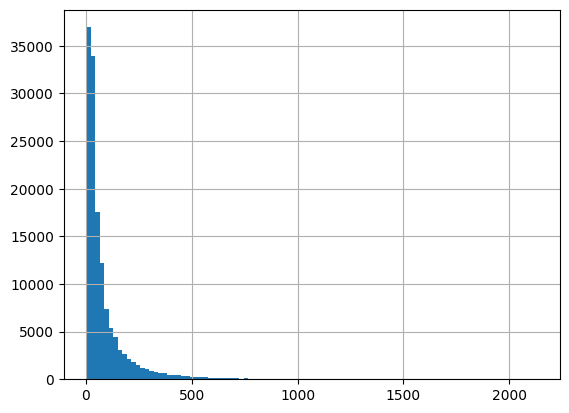

In [27]:
relevant_users['movieId'].hist(bins=100)

2449

In [31]:
user_df_fil = user_df[user_df['movieId'].isin(movies_keep)]

In [32]:
user_df_fil.shape

(11915796, 3)

In [33]:

len(movies_keep)

2449

In [34]:
movies_keep

[63479,
 74450,
 51471,
 59037,
 8800,
 54732,
 5584,
 87192,
 110553,
 7311,
 6977,
 4116,
 65802,
 4123,
 4089,
 2168,
 40723,
 8341,
 3599,
 3584,
 67193,
 6582,
 58306,
 554,
 8254,
 78088,
 86781,
 5096,
 5646,
 7484,
 1599,
 39449,
 62437,
 4537,
 3834,
 779,
 6196,
 95558,
 1839,
 8362,
 8266,
 8836,
 4580,
 2661,
 58297,
 7572,
 51925,
 2271,
 65585,
 4589,
 4354,
 54256,
 488,
 4274,
 78266,
 26375,
 2472,
 685,
 112138,
 90647,
 4736,
 79134,
 40148,
 118696,
 6063,
 59118,
 3840,
 7070,
 80693,
 8094,
 94780,
 99112,
 107406,
 5348,
 90531,
 47122,
 96588,
 74530,
 4591,
 7991,
 3813,
 27482,
 100714,
 1733,
 47382,
 4688,
 3117,
 2210,
 103980,
 38,
 3379,
 49910,
 61352,
 2267,
 6558,
 3926,
 6619,
 75,
 52694,
 5300,
 55245,
 4714,
 90249,
 241,
 6989,
 4709,
 7005,
 85881,
 4565,
 100383,
 36537,
 5625,
 4989,
 116823,
 5938,
 4496,
 6811,
 4774,
 79428,
 60753,
 513,
 8830,
 74324,
 8815,
 73015,
 3457,
 5628,
 80831,
 1326,
 8833,
 94466,
 4640,
 893,
 4293,
 7009,
 80

In [69]:
# #original von ross:
# input_df = pd.DataFrame(columns =['promptId', 'movieId', 'rating'])
# #for m_id in movies_keep:
# m_id = 554
# movie_search = user_df_fil[user_df_fil['movieId'] == m_id]
# movie_search_users = movie_search[movie_search['rating'] >= 4]
# users = movie_search_users['userId']
# movie_search_ratings = user_df_fil[user_df_fil['userId'].isin(users)].groupby('movieId', as_index=False).agg({'rating': 'mean'})
# prompt_ids = pd.DataFrame(np.full((len(movie_search_ratings['movieId']),),m_id),columns=['promptId'])
# movie_search_input = pd.concat([prompt_ids,movie_search_ratings], axis=1)
# input_df = pd.concat([input_df,movie_search_input])
# input_df

/tmp/ipykernel_271684/1035264681.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  input_df = pd.concat([input_df,movie_search_input])


,promptId,movieId,rating
0,554,1,4.152542
1,554,2,3.794521
2,554,3,3.545455
3,554,4,3.461538
4,554,5,3.672727
...,...,...,...
2186,554,108932,3.500000
2187,554,110553,3.000000
2188,554,112175,3.500000
2189,554,112556,4.000000


In [35]:
# ## VERSION IMPROVEMENT 1
# # summe der ratings die die fans von einem film agegeben haben / number of fans

# input_df = pd.DataFrame(columns =['promptId', 'movieId', 'rating'])

# # for loop mit m_id einmal durch alle movies
# # for m_id in movies_keep:
# m_id = 8800
# # create movie_search df with all users who rated the movie with m_id
# movie_search = user_df_fil[user_df_fil['movieId'] == m_id]
# #print (movie_search)
# # create movie_search_users df with all users who rated the movie with m_id with a rating of 4 or 5
# movie_search_fans = movie_search[movie_search['rating'] >= 4]
# #print(movie_search_fans)

# # just keep the userIds
# fans = movie_search_fans['userId']
# #print(fans)
# # count the number of 'fans' of the movie
# number_of_fans = len(fans) #added by philipp
# print('number of fans:', number_of_fans)
# fan_ratings = user_df_fil[user_df_fil['userId'].isin(fans)].groupby('movieId', as_index=False).agg({'rating': 'sum'})
# #print (fan_ratings)
# fan_ratings['rating'] = fan_ratings['rating'] / number_of_fans # added by philipp
# fan_ratings.sort_values(by='rating', ascending=False)
# # # pseudocode: fan_ratings[m_id] = 5 # added by philipp. correct movie itsef should be set to 5 stars
# # prompt_ids = pd.DataFrame(np.full((len(fan_ratings['movieId']),),m_id),columns=['promptId'])
# # movie_search_input = pd.concat([prompt_ids,fan_ratings], axis=1)
# # input_df = pd.concat([input_df,movie_search_input])

# ## VERSION IMPROVEMENT 2
# # Wie raten die fans von einem film die anderen filme im vergleich zu wie alle anderen die anderen filme raten
# # nur dieses abweichende auffällige verhalten soll bewertet werden - allerdings muss der andere film mindestens von 10 fans geschaut worden sein


In [104]:
## VERSION IMPROVEMENT 3
# fans sind die user die den film A mit 4 oder 5 bewertet haben
# bei der anzahl der wie oft ein film B geschaut wurde wird nur das die veränderung in den anteilen angeschaut:
# ###also von wie viel prozent der film B von den A fans angeschaut wurde im vergleich zu von wie viel prozent von allen usern der film B angeschaut wurde
# ### da ersters durch zweiteres geteilt wird:
# ### wenn ein film B von 100 der fans geschaut wurde aber nur von 25% aller user ist das ein faktor 4
# das ganze wird mit dem durchschnittsrating multipliziert die die fans einem film B gegeben haben

input_df = pd.DataFrame(columns =['promptId', 'movieId', 'combined_rating'])

# calculate total number of users
total_number_of_users = len(user_df_fil['userId'].unique())
#print('total number of users:', total_number_of_users)
# for loop mit m_id einmal durch alle movies
for m_id in movies_keep:
    #m_id = 554
    # create movie_search df with all users who rated the movie with m_id
    movie_search = user_df_fil[user_df_fil['movieId'] == m_id]
    #print (movie_search)
    # create movie_search_users df with all users who rated the movie with m_id with a rating of 4 or 5
    movie_search_fans = movie_search[movie_search['rating'] >= 4]
    #print(movie_search_fans)

    # just keep the userIds
    fans = movie_search_fans['userId']
    #print(fans)
    # count the number of 'fans' of the movie
    number_of_fans = len(fans) #added by philipp
    #print('number of fans:', number_of_fans)
    # calculate share of watchers of B Movie by all users
    share_of_Bwatchers = user_df_fil.groupby('movieId', as_index=False).agg({'userId': 'count'})
    share_of_Bwatchers['userId'] = share_of_Bwatchers['userId'] / total_number_of_users
    share_of_Bwatchers = share_of_Bwatchers.rename(columns={'userId': 'total_share'})
    share_of_Bwatchers.sort_values(by='total_share', ascending=False)



    # calculate mean fan rating of B Movies

    fan_ratings = user_df_fil[user_df_fil['userId'].isin(fans)].groupby('movieId', as_index=False).agg({'rating': 'sum'})
    #print (fan_ratings)
    fan_ratings['rating'] = fan_ratings['rating'] / number_of_fans # added by philipp
    fan_ratings.sort_values(by='rating', ascending=False)

    # merge share of Bwatchers and fan_ratings
    share_of_Bwatchers_merged = pd.merge(share_of_Bwatchers, fan_ratings, on='movieId', how='left')
    share_of_Bwatchers_merged['rating'] = share_of_Bwatchers_merged['rating'].fillna(0)
    share_of_Bwatchers_merged['combined_rating']= share_of_Bwatchers_merged['rating']/share_of_Bwatchers_merged['total_share']

    share_of_Bwatchers_merged['title']=share_of_Bwatchers_merged['movieId'].map(movies_df.set_index('movieId')['title'])
    # set the combinded value of the movie itself to the one of the most similar
    share_of_Bwatchers_merged.loc[share_of_Bwatchers_merged['movieId'] == m_id, 'combined_rating'] = 0
    share_of_Bwatchers_merged.loc[share_of_Bwatchers_merged['movieId'] == m_id, 'combined_rating'] = share_of_Bwatchers_merged['combined_rating'].max() + 10
    # scale minmax
    share_of_Bwatchers_merged['combined_rating'] = (share_of_Bwatchers_merged['combined_rating'] - 0) / (share_of_Bwatchers_merged['combined_rating'].max() - 0)
    share_of_Bwatchers_merged.sort_values(by='combined_rating', ascending=False)


    prompt_ids = pd.DataFrame(np.full((len(share_of_Bwatchers_merged['movieId']),),m_id),columns=['promptId'])
    save_two_columns = share_of_Bwatchers_merged[['movieId','combined_rating']]
    movie_search_input = pd.concat([prompt_ids,save_two_columns], axis=1)
    input_df = pd.concat([input_df,movie_search_input])

input_df

/tmp/ipykernel_271684/1340398309.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  input_df = pd.concat([input_df,movie_search_input])


,promptId,movieId,combined_rating
0,554,1,0.031469
1,554,2,0.079490
2,554,3,0.097737
3,554,4,0.312665
4,554,5,0.106025
...,...,...,...
2444,554,112852,0.000000
2445,554,115569,0.036684
2446,554,116797,0.000000
2447,554,116823,0.000000


In [ ]:
input_df.shape

(5953368, 3)

In [ ]:
2449*2449

5997601

In [ ]:
y = input_df['combined_rating']

In [ ]:
id_df = input_df[['promptId', 'movieId']]

In [ ]:
X_0 = pd.merge(left=id_df, right = movies_embed, how='left', left_on='promptId', right_index=True)

In [ ]:
X = pd.merge(left=X_0, right = movies_embed, how='left', left_on='movieId', right_index=True)

In [ ]:
X.shape

(5953368, 258)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, shuffle=True, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_test.shape

(1786011,)

In [ ]:
eval_df = X_test[['movieId']]

# Baseline model

In [ ]:
user_df_sc = user_df_fil.copy()
user_df_sc['rating'] = user_df_sc['rating']/5

In [ ]:
means_df = user_df_sc.groupby('movieId').agg({'rating': 'mean'})

In [ ]:
y_means = pd.merge(left=eval_df, right=means_df, left_on='movieId', right_index=True, how='left')

In [ ]:
y_baseline = y_means['rating']

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_baseline)

0.004053428802720185

In [ ]:
(286-405)/405

-0.2938271604938272

# Model

In [ ]:
user_wants = keras.Input(shape= (128,))
movie_plot = keras.Input(shape= (128,))

## Liked genres Input:
user_liked = keras.layers.Dense(128, activation= 'relu')(user_wants)
liked_dropout_1 = keras.layers.Dropout(rate=0.2)(user_liked)
liked_hidden_1 = keras.layers.Dense(64, activation= 'relu')(liked_dropout_1)
liked_hidden_2 = keras.layers.Dense(32, activation= 'relu')(liked_hidden_1)
liked_hidden_3 = keras.layers.Dense(16, activation= 'relu')(liked_hidden_2)
liked_hidden_4 = keras.layers.Dense(8, activation= 'relu')(liked_hidden_3)

## Movie Input:
movie_input = keras.layers.Dense(128, activation= 'relu')(movie_plot)
movie_dropout_1 = keras.layers.Dropout(rate=0.2)(movie_input)
movie_hidden_1 = keras.layers.Dense(64, activation= 'relu')(movie_dropout_1)
movie_hidden_2 = keras.layers.Dense(32, activation= 'relu')(movie_hidden_1)
movie_hidden_3 = keras.layers.Dense(16, activation= 'relu')(movie_hidden_2)
movie_hidden_4 = keras.layers.Dense(8, activation= 'relu')(movie_hidden_3)

## Merging:
merged_model = keras.layers.concatenate([liked_hidden_4, movie_hidden_4])
merged_model_hidden_1 = keras.layers.Dense(32, activation= 'relu')(merged_model)
merged_dropout_1 = keras.layers.Dropout(rate=0.2)(merged_model_hidden_1)
merged_model_hidden_2 = keras.layers.Dense(16, activation= 'relu')(merged_dropout_1)
merged_model_hidden_3 = keras.layers.Dense(8, activation= 'relu')(merged_model_hidden_2)

## Output Layer:
output_rating = keras.layers.Dense(1, activation= 'linear')(merged_model_hidden_3)

## Molding the Model togther:
model = keras.Model(inputs= [user_wants, movie_plot], outputs= output_rating)

## Compiling the Model:
model.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error')

In [ ]:
batch_size = 128
epochs = 40
es = EarlyStopping(patience=4, restore_best_weights=True)

history = model.fit(x= [X_train.iloc[:, 2:130], X_train.iloc[:, 130:]],
                  y= y_train,
                  epochs= epochs, verbose= 1, batch_size= batch_size, validation_split= 0.1, shuffle= True, callbacks = [es])

Epoch 1/40
29302/29302 [==============================] - 152s 5ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 2/40
29302/29302 [==============================] - 152s 5ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 3/40
29302/29302 [==============================] - 151s 5ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 4/40
29302/29302 [==============================] - 152s 5ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 5/40
29302/29302 [==============================] - 151s 5ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 6/40
29302/29302 [==============================] - 151s 5ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 7/40
29302/29302 [==============================] - 152s 5ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 8/40
29302/29302 [==============================] - 151s 5ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 9/40
29302/29302 [==============================] - 152s 5ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 10/40
29302/29302 [=====================

# Evaluation

In [ ]:
model_3.evaluate([X_test.iloc[:, 2:130], X_test.iloc[:, 130:]], y_test)

55813/55813 [==============================] - 110s 2ms/step - loss: 0.0029


0.0028604266699403524

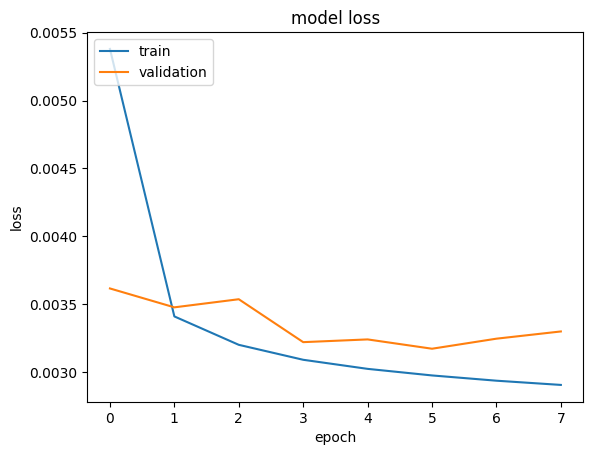

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
movies_embed.shape

(6204, 128)

In [ ]:
movies_embed_fil = movies_embed[movies_embed.index.isin(movies_keep)]

In [ ]:
movies_embed_fil.shape

(2449, 128)

In [ ]:
new_prompt = movies_embed_fil.head(1)

In [ ]:
new_prompts = pd.DataFrame(np.repeat(new_prompt.values, 2449, axis=0), columns=[str(i) + "_" for i in range(0,128,1)], index = movies_embed_fil.index)

In [ ]:
new_data = pd.concat([new_prompts,movies_embed_fil],axis=1, join='outer')

In [ ]:
new_data.shape

(2449, 256)

In [ ]:
y_pred = model_2.predict([new_data.iloc[:, 0:128], new_data.iloc[:, 128:]])

77/77 [==============================] - 0s 2ms/step


In [ ]:
ratings_pred = pd.DataFrame(y_pred, index = movies_embed_fil.index, columns=['ratings'])

In [ ]:
ratings_titles = pd.merge(left=ratings_pred, right = movies_df[['movieId','title']], on='movieId', how='left').sort_values(by='ratings', ascending=False)

In [ ]:
ratings_titles[0:20]

,movieId,ratings,title
48,1196,0.821670,Star Wars: Episode V - The Empire Strikes Back
532,908,0.818671,North by Northwest
82,5008,0.816089,Witness for the Prosecution
1575,4226,0.813389,Memento
249,1193,0.812274,One Flew Over the Cuckoo's Nest
49,750,0.812130,Dr. Strangelove or: How I Learned to Stop Worr...
81,3196,0.810436,Stalag 17
380,1203,0.809893,12 Angry Men
843,1204,0.809273,Lawrence of Arabia
1362,94466,0.809260,Black Mirror


In [ ]:
movies_embed_fil.head(1)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
movieId,,,,,,,,,,,,,,,,,,,,,
62,-0.530416,0.078947,-4.174719,-1.435039,-0.898514,-0.367455,0.821316,2.128489,-0.941272,0.09233,...,-0.210147,-1.126048,0.432286,-0.112529,-0.043328,0.398397,-2.933069,0.120806,-0.261634,1.418717


In [ ]:
pd.merge(left=new_prompt, right=movies_df, left_index=True, right_on='movieId', how='left')

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,title,plot_synopsis,movieId
0,-0.530416,0.078947,-4.174719,-1.435039,-0.898514,-0.367455,0.821316,2.128489,-0.941272,0.09233,...,-0.112529,-0.043328,0.398397,-2.933069,0.120806,-0.261634,1.418717,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...",62


In [ ]:
new_prompt_2 = movies_embed_fil.tail(1)

In [ ]:
movies_embed_fil.tail(1)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
movieId,,,,,,,,,,,,,,,,,,,,,
3728,-0.815098,-0.68295,-3.551226,-1.092486,0.052798,-1.020637,-0.344042,2.607695,-0.065807,0.684886,...,0.3909,-0.116829,-1.044274,-0.651202,-0.18648,1.035287,-1.555032,-0.338992,-1.114481,1.699152


In [ ]:
pd.merge(left=new_prompt_2, right=movies_df, left_index=True, right_on='movieId', how='left')

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,title,plot_synopsis,movieId
7971,-0.815098,-0.68295,-3.551226,-1.092486,0.052798,-1.020637,-0.344042,2.607695,-0.065807,0.684886,...,-0.651202,-0.18648,1.035287,-1.555032,-0.338992,-1.114481,1.699152,One False Move,"Three criminals, Ray, Pluto and Fantasia (Ray'...",3728


In [ ]:
new_prompts_2 = pd.DataFrame(np.repeat(new_prompt_2.values, 2449, axis=0), columns=[str(i) + "_" for i in range(0,128,1)], index = movies_embed_fil.index)
new_data_2 = pd.concat([new_prompts_2,movies_embed_fil],axis=1, join='outer')
y_pred_2 = model_2.predict([new_data_2.iloc[:, 0:128], new_data_2.iloc[:, 128:]])

77/77 [==============================] - 0s 2ms/step


In [ ]:
y_pred_2

array([[0.72760844],
       [0.7731784 ],
       [0.7136944 ],
       ...,
       [0.6602894 ],
       [0.5566347 ],
       [0.6806607 ]], dtype=float32)

In [ ]:
ratings_pred_2 = pd.DataFrame(y_pred_2, index = movies_embed_fil.index, columns=['ratings'])
ratings_titles_2 = pd.merge(left=ratings_pred_2, right = movies_df[['movieId','title']], on='movieId', how='left').sort_values(by='ratings', ascending=False)


In [ ]:
ratings_titles_2[0:20]

,movieId,ratings,title
53,926,0.832605,All About Eve
1574,923,0.831149,Citizen Kane
314,1252,0.830635,Chinatown
49,750,0.830087,Dr. Strangelove or: How I Learned to Stop Worr...
1096,1178,0.824577,Paths of Glory
380,1203,0.822995,12 Angry Men
730,1213,0.820868,Goodfellas
82,5008,0.819879,Witness for the Prosecution
1121,1945,0.819574,On the Waterfront
532,908,0.819337,North by Northwest


In [ ]:
new_prompt_3 = movies_embed_fil.head(2)

In [ ]:
new_prompts_3 = pd.DataFrame(np.repeat([new_prompt_3.values[1]], 2449, axis=0), columns=[str(i) + "_" for i in range(0,128,1)], index = movies_embed_fil.index)
new_data_3 = pd.concat([new_prompts_3,movies_embed_fil],axis=1, join='outer')
y_pred_3 = model_2.predict([new_data_3.iloc[:, 0:128], new_data_3.iloc[:, 128:]])

77/77 [==============================] - 0s 2ms/step


In [ ]:
ratings_pred_3 = pd.DataFrame(y_pred_3, index = movies_embed_fil.index, columns=['ratings'])
ratings_titles_3 = pd.merge(left=ratings_pred_3, right = movies_df[['movieId','title']], on='movieId', how='left').sort_values(by='ratings', ascending=False)


In [ ]:
ratings_titles_3[0:20]

,movieId,ratings,title
49,750,0.830228,Dr. Strangelove or: How I Learned to Stop Worr...
1574,923,0.827645,Citizen Kane
314,1252,0.827458,Chinatown
53,926,0.826420,All About Eve
380,1203,0.822614,12 Angry Men
532,908,0.821920,North by Northwest
1096,1178,0.821073,Paths of Glory
48,1196,0.820670,Star Wars: Episode V - The Empire Strikes Back
82,5008,0.820512,Witness for the Prosecution
730,1213,0.818941,Goodfellas


In [ ]:
import pickle

In [ ]:
pickle.dump(model_2, open('/content/gdrive/MyDrive/model_2.pkl', 'wb'))

In [ ]:
pickle.dump(model, open('model_1.pkl', 'wb'))

In [ ]:
with open('/content/gdrive/MyDrive/model_3.pkl', 'wb') as files:
    pickle.dump(model_3, files)